In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_squared_error
from nltk import ngrams

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
results_dir = '/content/drive/MyDrive/0AccTeam/results/'

In [5]:
results = pd.read_csv(results_dir+"results.csv", nrows=1000)
scaler = MinMaxScaler()
results["food_score"] = scaler.fit_transform(results[["food_score"]])
results["service_score"] = scaler.fit_transform(results[["service_score"]])

In [6]:
results_fb = pd.read_csv(results_dir+"results_facebook.csv")
testing_results = results_fb[["food_label", "service_label"]]
del results_fb["food_label"]
del results_fb["service_label"]

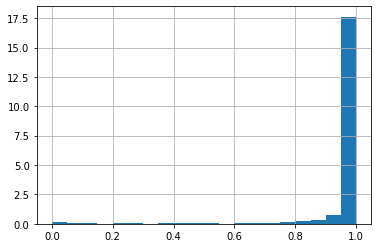

In [7]:
results_fb.food_score.hist(bins = np.arange(0,1.05, 0.05), density=True)

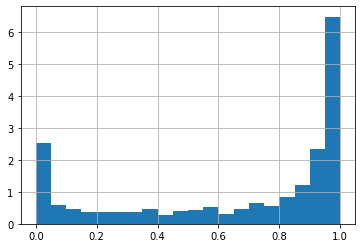

In [8]:
results_fb.service_score.hist(bins = np.arange(0,1.05, 0.05), density=True)

In [9]:
results_fb["food_label"] = results_fb["food_score"]>=0.95
results_fb["service_label"] = results_fb["service_score"]>=0.85

#print("Food reviews: ", results_fb["food_label"].sum())
#print("Service reviews: ", results_fb["service_label"].sum())

In [10]:
print("Food reviews: ", testing_results["food_label"].sum())
print("Service reviews: ", testing_results["service_label"].sum())

Food reviews:  508
Service reviews:  643


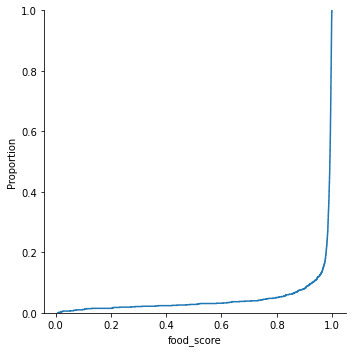

In [11]:
#Displot de food score
sns.displot(results_fb["food_score"], kind="ecdf")

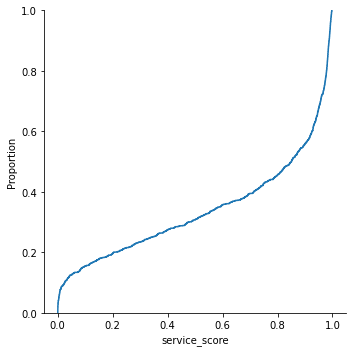

In [12]:
#Displot de service score
sns.displot(results_fb["service_score"], kind="ecdf")

In [13]:
np.random.seed(42)
random_array = np.random.rand(1000,1)

In [14]:
print("Recall Food:", recall_score(results["food_label"],testing_results["food_label"]))
print("Recall Service:", recall_score(results["service_label"],testing_results["service_label"]))

Recall Food: 0.8843416370106761
Recall Service: 0.9342301943198804


In [ ]:
food_th = 0
service_th = 0
list_food_recall = []
list_service_recall = []
list_threshold = []

for i in range(0,100,1):
  print("threshold",(100 - i)/100 )
  
  results_fb["food_label"] = results_fb["food_score"]>=(100 - i)/100
  results_fb["service_label"] = results_fb["service_score"]>=(100 - i)/100
  recall_food = recall_score(results_fb["food_label"],testing_results["food_label"])
  #print("Recall Food:", recall_food)
  recall_service = recall_score(results_fb["service_label"],testing_results["service_label"])
  #print("Recall Service:", recall_service)

  list_threshold.append((100 - i)/100 )
  list_service_recall.append(recall_service)
  list_food_recall.append(recall_food)
  
  print(" ")

In [16]:
list_food_recall = np.array(list_food_recall)
list_service_recall = np.array(list_service_recall)
list_threshold = np.array(list_threshold)

In [17]:
list_threshold[list_service_recall.argmax()]

0.98

In [18]:
list_threshold[list_food_recall.argmax()]

0.98

In [19]:
list_food_recall.argmax()

2

In [20]:
results_fb["food_label"] = results_fb["food_score"]>= 0.98
results_fb["service_label"] = results_fb["service_score"]>= 0.98

In [21]:
recall_food = recall_score(results_fb["food_label"],testing_results["food_label"])
  #print("Recall Food:", recall_food)
recall_service = recall_score(results_fb["service_label"],testing_results["service_label"])

In [22]:
recall_food

0.5544174135723432

In [23]:
recall_service

0.8118279569892473

## N-grams Service

In [38]:
#Bigrams - OurData
n = 2
ngrams = ngrams(" ".join(results[results["service_label"]==True]["text"]).split(), n)
ngrams = pd.Series(ngrams)
ngrams.value_counts().head(20)

(go, back)             39
(great, service)       36
(first, time)          36
(customer, service)    33
(great, food)          32
(food, good)           32
(food, great)          32
(service, great)       29
(really, good)         25
(come, back)           24
(food, service)        23
(good, food)           23
(good, service)        20
(every, time)          19
(highly, recommend)    19
(one, best)            17
(great, place)         17
(next, time)           16
(place, great)         16
(happy, hour)          15
dtype: int64

In [43]:
#Bigrams - FBData
n = 2
ngrams = ngrams(" ".join(results_fb[results_fb["service_label"]==True]["texto"]).split(), n)
ngrams = pd.Series(ngrams)
ngrams.value_counts().head(20)

(food, service)         13
(customer, service)     12
(great, service)        11
(food, good)            11
(go, back)              10
(service, great)        10
(first, time)           10
(really, good)           9
(ice, cream)             9
(highly, recommend)      8
(good, food)             7
(come, back)             7
(food, great)            6
(service, amazing)       6
(las, vegas)             6
(delicious, service)     5
(pad, thai)              5
(service, little)        5
(good, service)          5
(the, food)              5
dtype: int64

## N-grams Food

In [47]:
#Bigrams - OurData
n = 2
ngrams = ngrams(" ".join(results[results["food_label"]==True]["text"]).split(), n)
ngrams = pd.Series(ngrams)
ngrams.value_counts().head(20)

(food, good)           34
(food, great)          32
(great, service)       28
(great, food)          28
(good, food)           27
(go, back)             27
(service, great)       27
(really, good)         25
(first, time)          25
(food, service)        19
(fried, rice)          18
(come, back)           18
(good, service)        18
(pretty, good)         16
(place, great)         15
(one, best)            14
(service, good)        13
(great, place)         13
(staff, friendly)      13
(customer, service)    12
dtype: int64

In [50]:
#Bigrams - FBData
n = 2
ngrams = ngrams(" ".join(results_fb[results_fb["food_label"]==True]["texto"]).split(), n)
ngrams = pd.Series(ngrams)
ngrams.value_counts().head(20)

(go, back)             42
(first, time)          32
(food, great)          31
(food, good)           30
(great, service)       30
(really, good)         28
(great, food)          27
(come, back)           26
(good, food)           26
(customer, service)    24
(service, great)       24
(food, service)        23
(highly, recommend)    23
(next, time)           20
(good, service)        19
(every, time)          18
(happy, hour)          18
(love, place)          18
(ice, cream)           18
(one, best)            17
dtype: int64